<a href="https://colab.research.google.com/github/israelkingz/whatsapp_analytics/blob/main/whatsapp_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!sudo pip install emoji

     |████████████████████████████████| 51kB 3.2MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49717 sha256=9be4cd8bbaab47b3ab4e1b339bfd39cf5ff89b8e83e3cd0f2d26c69cc1811934
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [5]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import regex 
import re, nltk
import emoji
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


In [6]:
# Function to detect the date at the start of the line to make each row unique.
def DateTime(s):
    regex_format = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(regex_format, s)
    if result:
        return True
    return False

# Function to extract the group chat participant names
def Participants(a):
  a=a.split(":")
  if len(a)==2:
    return True
  else:
    return False

# Function to organize the data properly to be represented as a pandas dataframe
def GetDataPoints(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if Participants(message): 
        splitMessage = message.split(': ') 
        participants = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        participants = None
    return date, time, participants, message

 # Function to extract the emojis and add them to a new column
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list



In [7]:
parsedData=[]
data = [] 
text_data = '/content/WhatsApp Chat with AI+Club UI.txt' # replace with the file name of your text data
with open(text_data, encoding="utf-8") as fp: #fp stands for file pointer and helps in reading in the data
    fp.readline()
    messageBuffer = [] 
    date, time, participants = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if DateTime(line): 
            if len(messageBuffer)> 0: 
                parsedData.append([date, time, participants, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, participants, message = GetDataPoints(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)


In [8]:
clean_data = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Participants', 'Message']) # Reading in the data in a dataframe form
clean_data["Date"] = pd.to_datetime(clean_data["Date"])# making sure the date column is in a datetime format.  
clean_data["emoji"] = clean_data["Message"].apply(split_count) # Applying the emoji function to extract the emojis from the messages.

clean_data.head(10) # Having a look at the first 10 entries


,Date,Time,Participants,Message,emoji
0,2020-03-30,1:37 PM,None,"DS Erenest created group ""AI+Club UI""",[]
1,2020-03-30,1:37 PM,None,DS Erenest added you,[]
2,2020-03-30,1:38 PM,IsraelkingzDev,Awon Oga oh 🙇‍♂️🙇‍♂️🙇‍♂️🙇‍♂️,"[🙇‍♂️, 🙇‍♂️, 🙇‍♂️, 🙇‍♂️]"
3,2020-03-30,1:38 PM,None,DS Erenest changed this group's icon,[]
4,2020-03-30,1:39 PM,None,DS Erenest added +234 906 200 0119,[]
5,2020-03-30,1:46 PM,DS Erenest,This message was deleted,[]
6,2020-03-30,1:46 PM,DS Erenest,Hi Sir/ma,[]
7,2020-03-30,1:48 PM,DS Erenest,This is the potential AI + Club for University...,[]
8,2020-03-30,1:49 PM,DS Erenest,I will roll out a draft to capture student of ...,[]
9,2020-03-30,2:19 PM,IsraelkingzDev,Kk,[]


In [9]:
clean_data.shape

(14199, 5)

In [10]:
len(clean_data['Participants'].unique())

265

In [11]:
clean_data['Date'][0] - clean_data['Date'][13934]

Timedelta('-277 days +00:00:00')

In [12]:
clean_data['Date'][13934]

Timestamp('2021-01-01 00:00:00')

In [13]:
# To understand the number od the image data
img = clean_data[clean_data['Message'] == "<Media omitted>" ]
img.shape

(732, 5)

In [14]:
totalNumberofMessage = clean_data.Message.count()
username   = clean_data["Participants"].unique() #unique is a functions that able find the unique elements of an array

print('The total of the number of message:',totalNumberofMessage)
print('User name that involve in the chat:',username)

The total of the number of message: 14199
User name that involve in the chat: [None 'IsraelkingzDev' 'DS Erenest' '+234 813 596 1642'
 '+234 703 527 3609' '+234 814 150 0788' '+234 903 222 3292'
 '+234 907 149 6878' '+234 906 093 5451' '+234 907 750 6385'
 '+234 908 470 7775' '+234 815 670 6727' '+234 903 432 4029'
 '+234 813 167 5266' '+234 706 718 0477' '+234 809 757 0191'
 '+234 906 904 1324' '+234 703 909 3399' '+234 703 208 2725'
 '+234 909 130 5248' '+234 816 250 9378' '+234 708 070 1968'
 '+234 708 102 7426' 'Femi AI' '+234 802 247 1355' '+234 703 913 6107'
 '+234 810 954 9798' 'Wura SheCodeAfrica UI' 'Miss VivHub67'
 '+234 814 139 3092' '+234 903 241 9608' '+234 809 139 1040'
 '+234 902 111 5139' '+234 806 512 7892' '+234 806 365 5616'
 '+234 814 582 9895' '+234 906 620 0930' '+234 808 740 9400'
 '+234 814 257 5000' '+234 809 680 0925' '+234 810 936 6204'
 '+234 806 656 4500' '+234 813 611 1716' '+234 818 794 5127'
 '+234 708 832 8356' '+234 814 908 2498' '+234 814 890 0992'
 '

In [15]:
clean_data1 = clean_data.copy()

In [16]:
clean_data1

,Date,Time,Participants,Message,emoji
0,2020-03-30,1:37 PM,None,"DS Erenest created group ""AI+Club UI""",[]
1,2020-03-30,1:37 PM,None,DS Erenest added you,[]
2,2020-03-30,1:38 PM,IsraelkingzDev,Awon Oga oh 🙇‍♂️🙇‍♂️🙇‍♂️🙇‍♂️,"[🙇‍♂️, 🙇‍♂️, 🙇‍♂️, 🙇‍♂️]"
3,2020-03-30,1:38 PM,None,DS Erenest changed this group's icon,[]
4,2020-03-30,1:39 PM,None,DS Erenest added +234 906 200 0119,[]
...,...,...,...,...,...
14194,2021-01-15,8:44 AM,AI Club UI Member,"Good morning, I have no idea.",[]
14195,2021-01-15,8:58 AM,+234 814 928 1272,Thank you!,[]
14196,2021-01-15,9:37 AM,+234 816 165 0498,This message was deleted,[]
14197,2021-01-15,10:04 AM,+234 816 165 0498,Noted Available,[]


Some EDA 
1.  Which users have the most Chat/messages in the group?
2.   Which emojis use the most by which users?
3. Most active hours?
4. Which month have the highest messages and also the busiest month?
5. Determine which word or text did the user use the most?



In [17]:
clean_data['Date'][0] #The group was created 3oth March, 2020 

Timestamp('2020-03-30 00:00:00')

In [18]:
clean_data1['Number_of_messages'] = [1]* clean_data1.shape[0]
clean_data1.drop(['Date', 'Time'], axis =1)

#We are groupby the user and messages together then we will use count() to count the messages for each of user
clean_data1 = clean_data1.groupby('Participants')['Number_of_messages'].count().sort_values(ascending = False).reset_index() 
clean_data1

,Participants,Number_of_messages
0,DS Erenest,3523
1,IsraelkingzDev,1631
2,DS Adeniyi,993
3,+234 703 044 4160,624
4,AI Club UI Member,331
...,...,...
259,+234 810 588 3155,1
260,+234 903 361 2063,1
261,+234 810 667 0941,1
262,+234 810 701 1768,1


In [19]:
clean_data['Participants']

0                     None
1                     None
2           IsraelkingzDev
3                     None
4                     None
               ...        
14194    AI Club UI Member
14195    +234 814 928 1272
14196    +234 816 165 0498
14197    +234 816 165 0498
14198       Siji AIclub UI
Name: Participants, Length: 14199, dtype: object

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

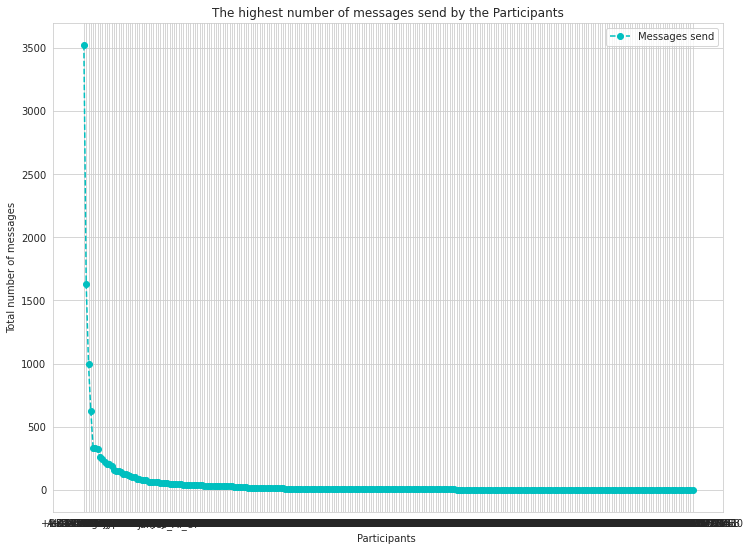

In [21]:
#  Using seaborn for Styles 
sns.set_style("whitegrid")

# Resize the  figure size
plt.figure(figsize=(12, 9))

# Here we are ploting the line chart using plt.plot 
plt.plot(clean_data1.Participants, clean_data1.Number_of_messages, 'o--c')  

# In here we are writing the Labels and Title for the plot chart
plt.xlabel('Participants ')
plt.ylabel('Total number of messages')

plt.title("The highest number of messages send by the Participants")
plt.legend(['Messages send']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


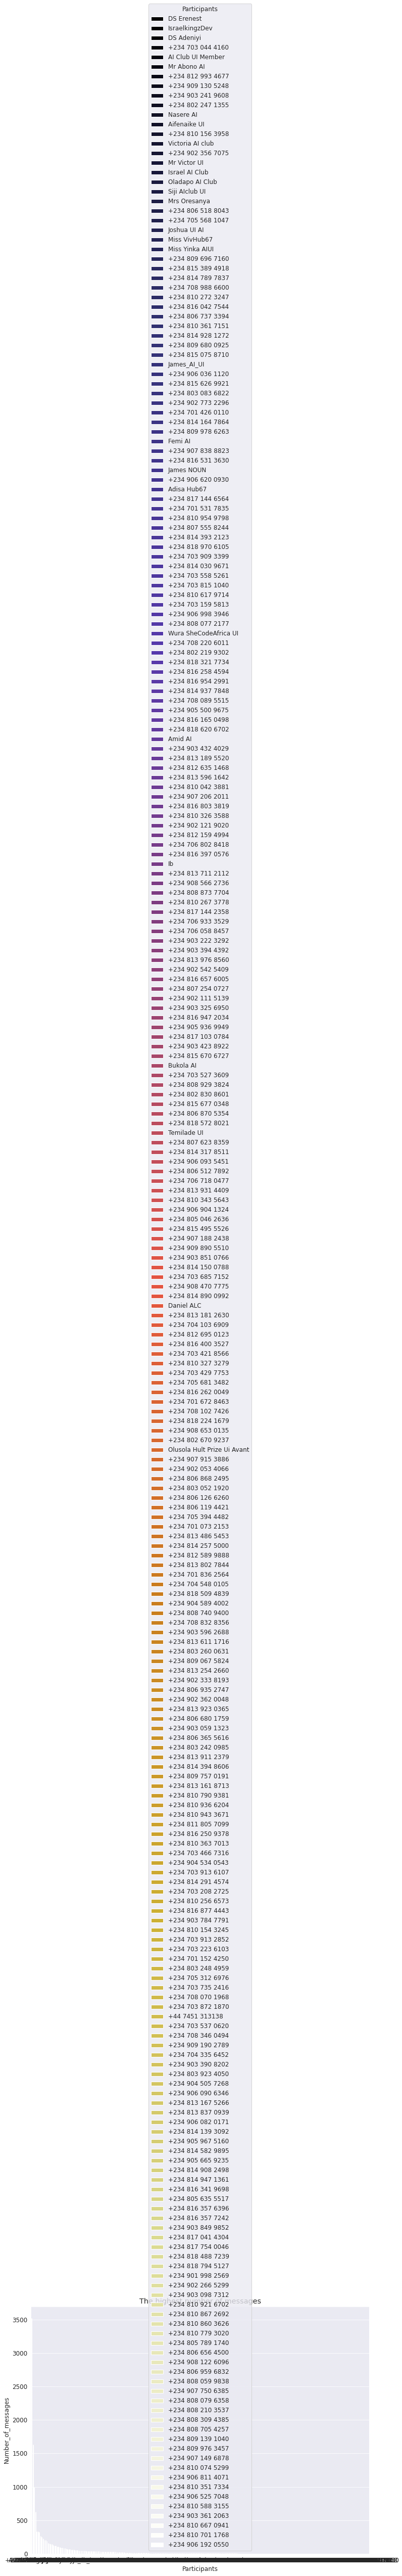

In [51]:
#Formating
sns.set_style("darkgrid")
import matplotlib

#The background of the chart
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

#Creating a bar chart
sns.barplot(clean_data1.Participants,clean_data1.Number_of_messages,hue='Participants',data=clean_data1,dodge=False,palette="CMRmap")

#The title of our charts
plt.title("The highest number of messages")

#Change the width of the bar chart plot
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
plt.show()

In [57]:
#Copy a dataset
clean_data2 = clean_data1.copy()

#Count the number of emoji
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys()) #UNICODE_EMOJI class have a thee emoji code inside
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in clean_data2.iterrows():
    emojis_found = r.findall(row["Participants"]) #The findall() is a functions for regex that help to find a matches 
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1

In [58]:
#This will help to create or rendered the emoji 
emojis_df = pd.DataFrame() #The reason to use pd.dataframe is we want to put the emojis_df into the dataframe tables
emojis_df['emoji'] = [''] * 10
emojis_df['number_of_Emoji'] = [0] * 10

i = 0
for item in emoji_ctr.most_common(10):
    emojis_df.emoji[i] = item[0]
    emojis_df.number_of_Emoji[i] = int(item[1])
  
    i += 1

emojis_df

,emoji,number_of_Emoji
0,,0
1,,0
2,,0
3,,0
4,,0
5,,0
6,,0
7,,0
8,,0
9,,0


In [59]:
emojis_df.value_counts()

emoji  number_of_Emoji
       0                  10
dtype: int64

In [61]:
#This pei chart give us and ideas the overall view of which emoji use the most
import plotly.express as px
fig = px.pie(emojis_df, values='number_of_Emoji', names='emoji',title='Emoji percentage used in chat group')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Most active hours of chat on the whatsapp group

In [66]:
#Copy a dataframe
clean_data3 = clean_data.copy()

In [67]:
clean_data3

,Date,Time,Participants,Message,emoji
0,2020-03-30,1:37 PM,None,"DS Erenest created group ""AI+Club UI""",[]
1,2020-03-30,1:37 PM,None,DS Erenest added you,[]
2,2020-03-30,1:38 PM,IsraelkingzDev,Awon Oga oh 🙇‍♂️🙇‍♂️🙇‍♂️🙇‍♂️,"[🙇‍♂️, 🙇‍♂️, 🙇‍♂️, 🙇‍♂️]"
3,2020-03-30,1:38 PM,None,DS Erenest changed this group's icon,[]
4,2020-03-30,1:39 PM,None,DS Erenest added +234 906 200 0119,[]
...,...,...,...,...,...
14194,2021-01-15,8:44 AM,AI Club UI Member,"Good morning, I have no idea.",[]
14195,2021-01-15,8:58 AM,+234 814 928 1272,Thank you!,[]
14196,2021-01-15,9:37 AM,+234 816 165 0498,This message was deleted,[]
14197,2021-01-15,10:04 AM,+234 816 165 0498,Noted Available,[]


In [69]:
clean_data3['number_of_message'] = [1] * clean_data3.shape[0]

clean_data3['hours'] = clean_data3.Time.map( lambda x: x.hour)

time_df = clean_data3.groupby('hours').count().reset_index().sort_values(by = 'hours')


time_df

AttributeError: ignored